In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm

In [319]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [320]:
api.dataset_download_file('jackogozaly/data-science-and-stem-salaries','Levels_Fyi_Salary_Data.csv')

False

In [321]:
df1 = pd.read_csv('Levels_Fyi_Salary_Data.csv.zip')

In [322]:
#The data is made up of 62642 rows and 29 columns
df1.shape

(62642, 29)

In [323]:
#Exploring datatypes
df1.dtypes

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education           

In [324]:
#Listing the columns
df1.head(4)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [325]:
#Choosing the columns we need
df1 = df1[['timestamp','gender', 'company', 'title', 'totalyearlycompensation','location', 'yearsofexperience','Race','Education']]

In [326]:
#Calculating Null values
count_null = pd.DataFrame(df1.isnull().sum(), columns = ['Null Values'])
count_null

,Null Values
timestamp,0
gender,19540
company,5
title,0
totalyearlycompensation,0
location,0
yearsofexperience,0
Race,40215
Education,32272


In [327]:
#Dropping not a number values
df1 = df1.dropna()
df1

,timestamp,gender,company,title,totalyearlycompensation,location,yearsofexperience,Race,Education
15710,1/27/2020 22:59:06,Male,Google,Software Engineer,400000,"Sunnyvale, CA",5.0,Asian,PhD
23532,7/3/2020 19:56:38,Male,Microsoft,Software Engineer,136000,"Redmond, WA",3.0,Two Or More,Bachelor's Degree
23533,7/3/2020 20:03:57,Male,Google,Software Engineer,337000,"San Bruno, CA",6.0,Asian,Bachelor's Degree
23534,7/3/2020 20:05:37,Male,Microsoft,Software Engineer,222000,"Seattle, WA",4.0,Asian,Master's Degree
23535,7/3/2020 20:19:06,Male,Blend,Software Engineer,187000,"San Francisco, CA",5.0,White,Bachelor's Degree
...,...,...,...,...,...,...,...,...,...
61981,2/15/2021 19:50:36,Male,Facebook,Software Engineering Manager,1470000,"Menlo Park, CA",9.0,Asian,Bachelor's Degree
61982,3/9/2021 17:03:07,Male,Google,Product Manager,4500000,"San Francisco, CA",20.0,Asian,Master's Degree
61984,3/25/2021 10:45:03,Female,Zapier,Software Engineering Manager,1605000,"Denver, CO",16.0,White,Master's Degree
61987,5/18/2021 15:34:21,Male,Facebook,Software Engineering Manager,2372000,"Menlo Park, CA",22.0,Black,Master's Degree


In [328]:
#Cheking if data is clean
count_null = pd.DataFrame(df1.isnull().sum(), columns = ['Null Values'])
count_null

,Null Values
timestamp,0
gender,0
company,0
title,0
totalyearlycompensation,0
location,0
yearsofexperience,0
Race,0
Education,0


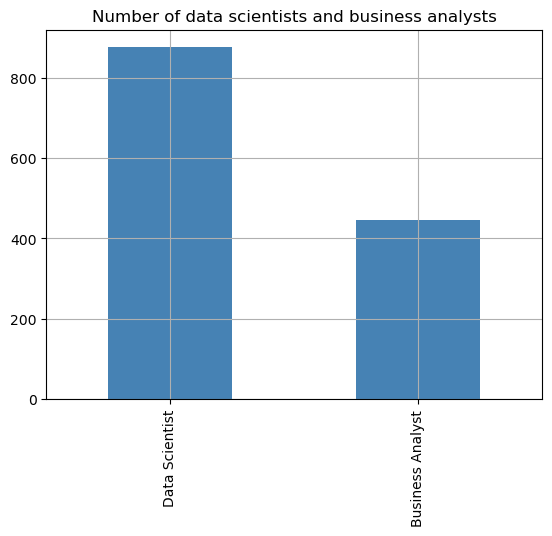

In [329]:
#Choosing data science and business analyst jobs
undesired_titles = ['Software Engineer', 'Product Manager', 'Software Engineering Manager', 'Hardware Engineer', 'Product Designer', 'Technical Program Manager', 'Solution Architect', 'Management Consultant', 'Marketing', 'Mechanical Engineer', 'Sales', 'Recruiter', 'Human Resources']
df1_orginal = df1.copy()
df1 = df1[df1['title'].apply(lambda x: x not in undesired_titles)]
bar = df1.title.value_counts().plot.bar(color='steelblue')
plt.title('Number of data scientists and business analysts', size=12)
plt.grid(True)


For our analysis, we have considered 866 Data Scientists (approximately 66% of our datapoints) and 441 Business Analysts (approximately 34% of our datapoints).

In [330]:
#Cleaning 'other' from gender
df1 = df1[df1['gender'] != 'Other']

Text(0.5, 1.0, 'Distribution of total yearly compensation')

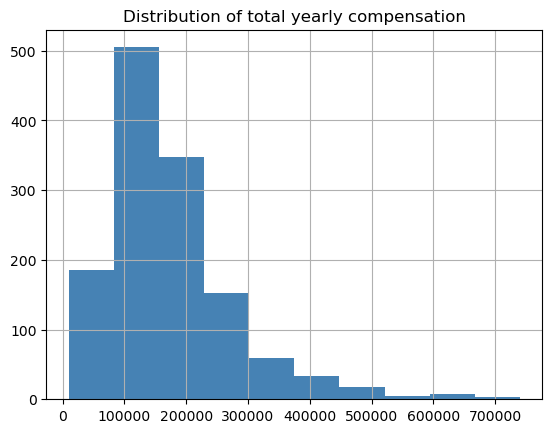

In [331]:
#Checking the distribution of the total compensation for our roles
df1['totalyearlycompensation'].hist(color='steelblue')
plt.title("Distribution of total yearly compensation")

As observed from the distribution chart above, the total compensation is right skewed. This is due to the presence of professionals with compensation in excess of USD 300,000. The median total compensation is USD 150,000.

Summary Statistics


,totalyearlycompensation
count,"1,314.00"
mean,"171,302.89"
std,"103,262.90"
min,"10,000.00"
25%,"101,000.00"
50%,"150,000.00"
75%,"215,000.00"
max,"740,000.00"


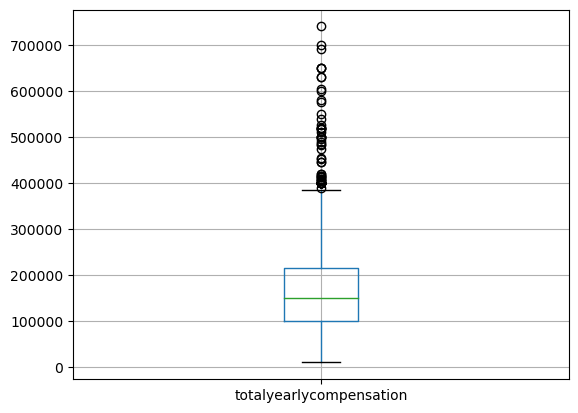

In [332]:
df1.boxplot(column = 'totalyearlycompensation')
print("Summary Statistics")
df1[['totalyearlycompensation']].describe().applymap('{:,.2f}'.format)

The five-number summary evident from the boxplot above is the minimum compensation (USD 10,000), first quartile (USD 101,000), median (USD 150,000), third quartile (USD 215,000), and maximum (USD 740,000).

In [333]:
#Converting timestamp to date format
df1['date'] = pd.to_datetime(df1.timestamp)

In [334]:
#Removing time from date
df1['new_date'] = [d.date() for d in df1['date']]

In [335]:
#Splitting location column
df1[['city', 'state', 'country']] = df1['location'].str.split(',', expand=True)
df1.country.fillna('United States',inplace=True)
df1.head(2)

,timestamp,gender,company,title,totalyearlycompensation,location,yearsofexperience,Race,Education,date,new_date,city,state,country
23679,7/6/2020 17:16:12,Male,Google,Data Scientist,170000,"San Francisco, CA",3.0,White,Bachelor's Degree,2020-07-06 17:16:12,2020-07-06,San Francisco,CA,United States
23685,7/6/2020 18:03:05,Female,Facebook,Data Scientist,205000,"Menlo Park, CA",0.0,Asian,PhD,2020-07-06 18:03:05,2020-07-06,Menlo Park,CA,United States


In [336]:
#Choosing education levels we're interested in
exclude_education = ['Some College', 'Highschool']
df1 = df1[df1['Education'].apply(lambda x: x not in exclude_education)]

In [337]:
#All columns in lower case
df1.columns= df1.columns.str.lower()

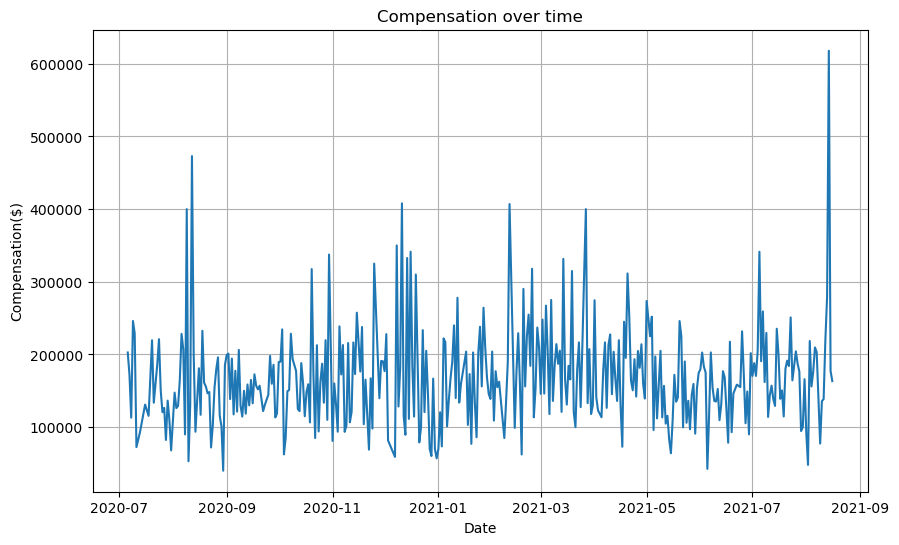

In [338]:
#Checking the analyzing period and salaries variation
df1.groupby('new_date').mean()['totalyearlycompensation'].plot(kind="line", figsize=(10,6))
plt.title("Compensation over time")
plt.ylabel("Compensation($)")
plt.xlabel("Date")

plt.grid(True)

As evident from the line graph above, the total compensation between July 2020 and September 2021 was widely distributed around the mean (approximately USD 171,598) with a standard deviation of (approximately USD 103,338).

In [339]:
#Selecting more than 7 employees per country to make our output representable
test = df1.groupby(['country']).count()['totalyearlycompensation'].reset_index()
test1 = test[test['totalyearlycompensation'] > 7]

In [340]:
#Merging selected countries with more than 7 employees with initial dataset
df2 = df1.groupby(['country']).mean().reset_index()
df3 = df2[['country','totalyearlycompensation']].sort_values('totalyearlycompensation', ascending = False)
df4 = df3.merge(test1, how='inner', on='country')
df4 = df4[['country','totalyearlycompensation_x']]
df4.head(2)

,country,totalyearlycompensation_x
0,United States,189696.913003
1,United Kingdom,131827.586207


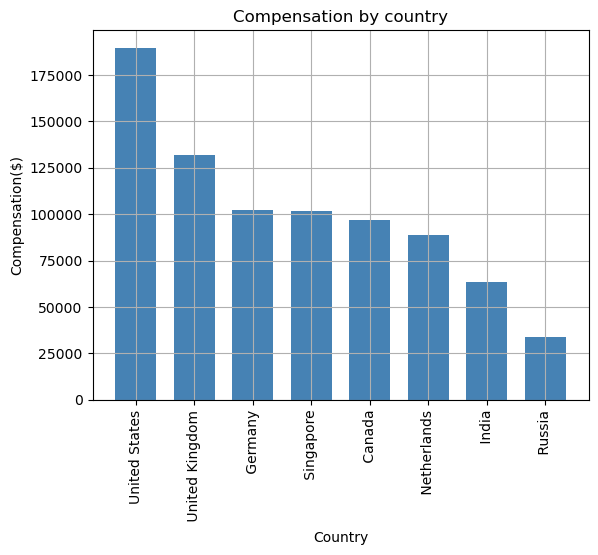

In [341]:
plt.bar(df4['country'], df4['totalyearlycompensation_x'], color ='steelblue',
        width = 0.7)
plt.title('Compensation by country', size=12)
plt.xticks(rotation=90)
plt.xlabel('Country', size = 10)
plt.ylabel('Compensation($)', size = 10)
plt.grid(True)
plt.show()

US pays the highest on average compensation while Europe comes second, at the same time Asian region have the lowest average salaries.

In [342]:
#Adding information about gender
df4 = df4[['country']]
df4 = df1.merge(df4, how='inner', on='country')

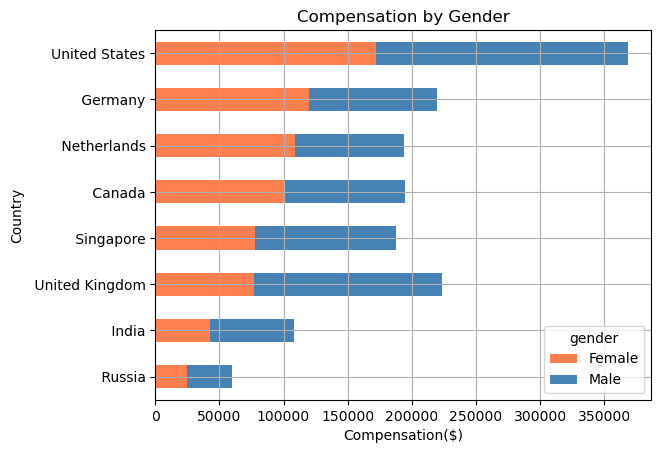

In [343]:
#Trend for female and male
by_male = df4.pivot_table('totalyearlycompensation', 
                         index = 'country',
                         columns = 'gender',
                        aggfunc='mean')
by_male = by_male.dropna()
by_male = by_male.sort_values(by=['Female'])
by_male.plot(kind='barh', stacked=True, color=['coral','steelblue'])
plt.title('Compensation by Gender', size=12)
plt.xlabel('Compensation($)', size = 10)
plt.ylabel('Country', size = 10)
plt.grid(True)
plt.show()

We can see the difference in compensation between male, female by country. Except for Germany, Netherlands and Canada. Men generally receive higher salaries than women.  

In [344]:
#Adding columns for data scientist's role and business analyst
df1['data scientist'] = np.where(df1['title']=='Data Scientist',1,0)
df1['business analyst'] = np.where(df1['title']=='Business Analyst',1,0)

In [345]:
#Calculating number of data scientists for each country
titles = df1.groupby(['country']).sum()
titles = titles[['data scientist', 'business analyst']]
titles.head(2)

,data scientist,business analyst
country,,
Argentina,0,1
Australia,2,3


In [346]:
#Adding compensation
df5=pd.merge(df3,titles, on=['country','country'])
df5 = df5.sort_values('totalyearlycompensation', ascending = False)
df5.head(2)

,country,totalyearlycompensation,data scientist,business analyst
0,United States,189696.913003,712,357
1,Israel,188833.333333,6,0


<AxesSubplot:title={'center':'Data Scientists'}, ylabel='Professionals'>

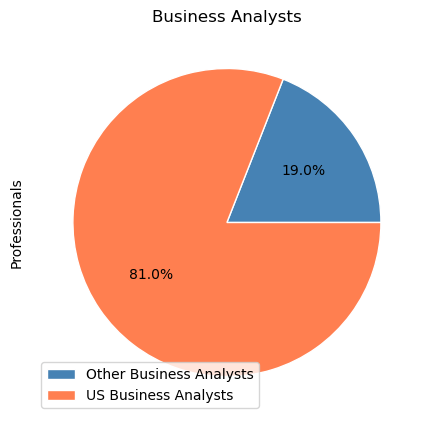

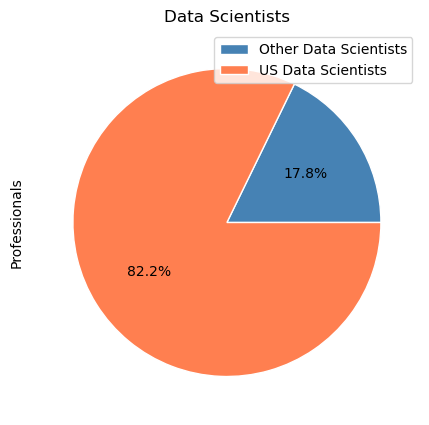

In [347]:
#Describing our Dataset- Mostly US based Business Analysts and Data Scientists included in our Dataset 
Non_US_DS = df5.loc[df5['country'] != "United States", 'data scientist'].sum()
Non_US_BA = df5.loc[df5['country'] != "United States", 'business analyst'].sum()
US_BA = df5.loc[df5['country'] == "United States", 'business analyst'].values[0]
US_DA = df5.loc[df5['country'] == "United States", 'data scientist'].values[0]
BA_Data = [['Other Business Analysts',Non_US_BA],['US Business Analysts',US_BA]]
DS_Data = [['Other Data Scientists',Non_US_DS],['US Data Scientists',US_DA]]
dfp1 = pd.DataFrame(BA_Data, columns=['Title','Professionals'])
dfp2 = pd.DataFrame(DS_Data, columns=['Title','Professionals'])
dfp1.groupby(['Title']).sum().plot(kind='pie', y='Professionals',autopct='%1.1f%%',wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=['steelblue','coral'], labels=None, title= 'Business Analysts', figsize = (7,5))
dfp2.groupby(['Title']).sum().plot(kind='pie', y='Professionals',autopct='%1.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=['steelblue','coral'], labels=None, title= 'Data Scientists', figsize = (7,5))

More than 80% of the Data Scientists and Business Analysts studied in our dataset are from the United States.

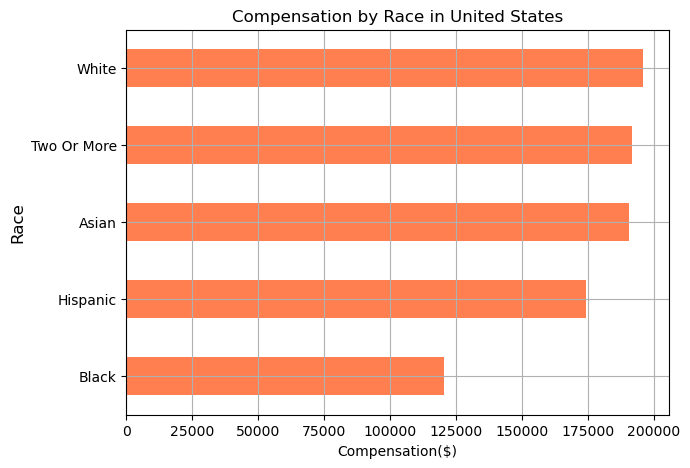

In [348]:
#Since most of the data coming from United States we can analyze compensation by race in th US
United_States = df1[df1['country'].str.startswith('United')]
United_States.groupby('race').mean()['totalyearlycompensation'].sort_values().plot.barh(color='coral', figsize = (7,5))
plt.title('Compensation by Race in United States', size=12)
plt.xlabel('Compensation($)', size = 10)
plt.ylabel('Race', size = 12)
plt.grid(True)

We didn’t find any significant difference between white, two or more, or Asian race.
But we need to consider meaningful actions to decrease the difference between the first group and the Hispanic and black professionals in data industries.

In [349]:
#Describing education level for Data Scientist and Business Analyst in US
United_States['education'].unique()
United_States['education'].value_counts()

Master's Degree      525
Bachelor's Degree    357
PhD                  187
Name: education, dtype: int64

<AxesSubplot:ylabel='education'>

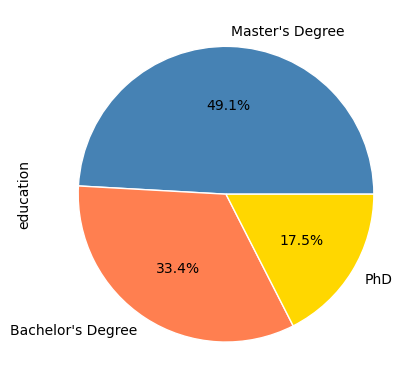

In [350]:
colors = ['coral', 'steelblue', '#8fd9b6', '#d395d0','gold']
United_States['education'].value_counts().plot(kind='pie',autopct='%1.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=('steelblue','coral','gold'))

Almost half of the professionals studied in our dataset have a Master's Degree.

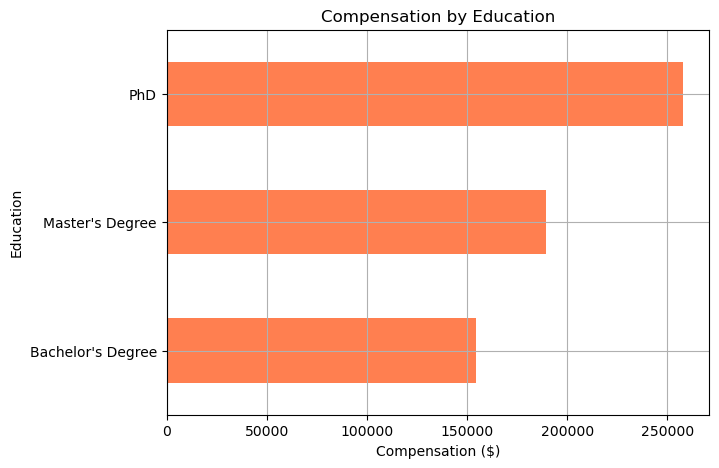

In [351]:
# Average salary by education in US
pay_by_education = United_States[['totalyearlycompensation','education']].groupby(['education']).mean().round()\
.sort_values('totalyearlycompensation', ascending = True).plot.barh(figsize = (7,5), legend = False, color='coral')
plt.title('Compensation by Education', size = 12)
plt.xlabel('Compensation ($)', size = 10)
plt.ylabel('Education', size = 10)
plt.grid(True)
plt.show()

Comparing compensation by level of education. As evident, PhD holders get paid significantly more than other professionals.  

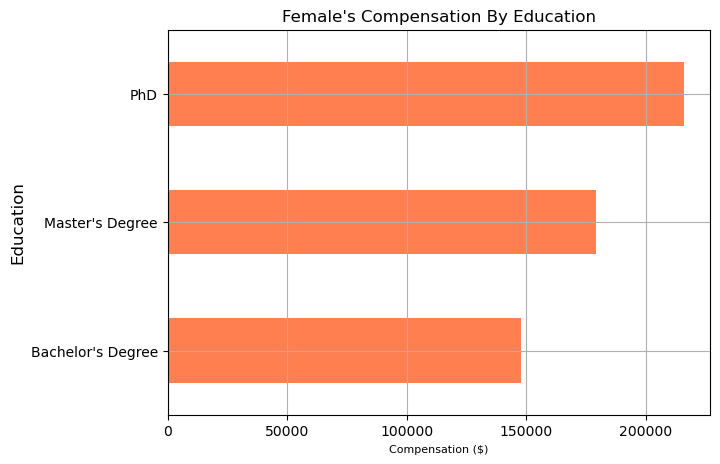

In [352]:
#Female's Salary by Education in US
female_df = United_States[United_States["gender"] == "Female"]
female_education_salary = female_df[['totalyearlycompensation','education']].groupby(['education']).mean().round()\
.sort_values('totalyearlycompensation', ascending = True).plot.barh(figsize = (7,5), legend = False, color='coral')
plt.title("Female's Compensation By Education", size = 12)
plt.xlabel('Compensation ($)', size = 8)
plt.ylabel('Education', size = 12)
plt.grid(True)
plt.show()

The compensation tends to increase with the level of educational attainment for female in our dataset.

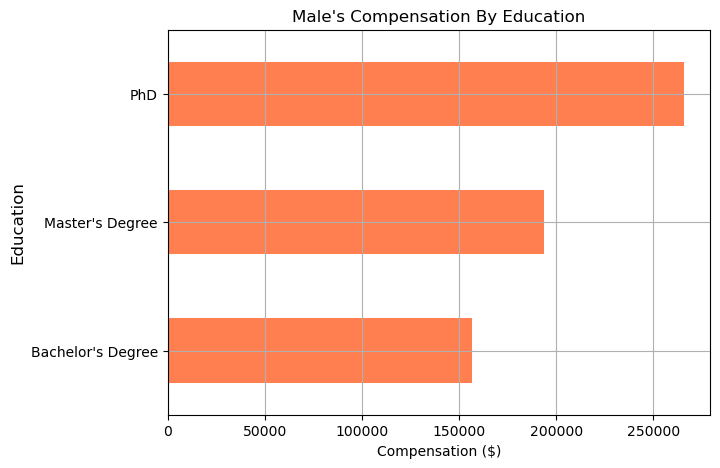

In [353]:
#Male's Salary by Education in US
male_df = United_States[United_States["gender"] == "Male"]
male_education_salary = male_df[['totalyearlycompensation','education']].groupby(['education']).mean().round()\
.sort_values('totalyearlycompensation', ascending = True).plot.barh(figsize = (7,5), legend = False, color='coral')
plt.title("Male's Compensation By Education", size = 12)
plt.xlabel('Compensation ($)', size = 10)
plt.ylabel('Education', size = 12)
plt.grid(True)
plt.show()

The compensation tends to increase with the level of educational attainment for male in our dataset.
But we can see male's average compensation by education is higher than female's average compensation by education. 

Text(0.5, 1.0, 'Compensation by Education')

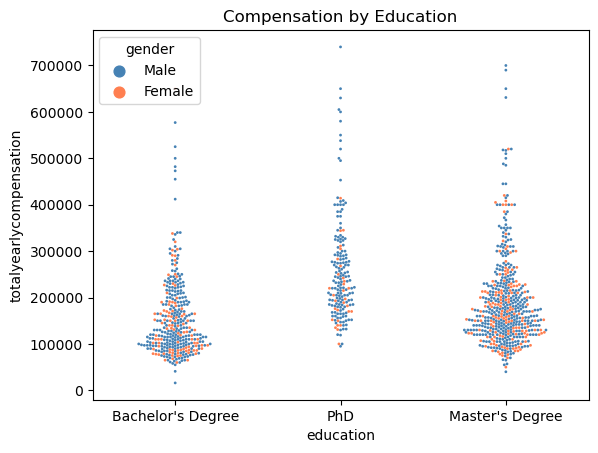

In [354]:
#Compensation by Education with distribution
ax2 = sns.swarmplot(x= 'education', y ='totalyearlycompensation', data=United_States, hue ='gender', size =2, palette=dict(Male = 'steelblue', Female = 'coral'))
ax2.set_title('Compensation by Education')

The graph above captures level of compensation by gender, segregated in 3 categories based on level of education. 

In [355]:
#Number of females working as DS and BA
female_jobs = female_df.pivot_table('gender', 
                         columns = 'title',
                        aggfunc='count')
female_jobs

title,Business Analyst,Data Scientist
gender,117,169


In [356]:
#Number of males working as DS and BA
male_jobs = male_df.pivot_table('gender', 
                         columns = 'title',
                        aggfunc='count')
male_jobs

title,Business Analyst,Data Scientist
gender,240,543


In [357]:
#Selecting the columns that are needed for the analysis
female_df = female_df[['gender', 'company', 'title', 'totalyearlycompensation', 'yearsofexperience',]]
female_df.head(2)

,gender,company,title,totalyearlycompensation,yearsofexperience
23685,Female,Facebook,Data Scientist,205000,0.0
23764,Female,Expedia,Data Scientist,131000,1.0


<AxesSubplot:ylabel='% of Female Professionals'>

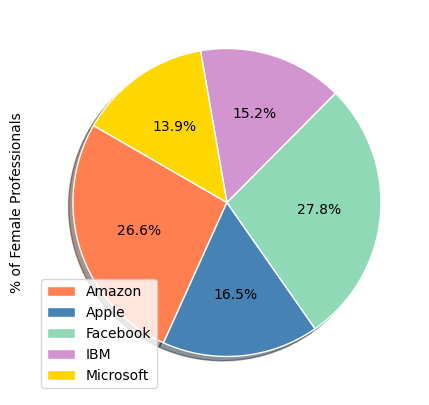

In [358]:
#Average number of females by company
female_company_count = female_df.groupby("company").count()['gender'].reset_index()
female_company_count = female_company_count[female_company_count['gender'] > 10]
female_company_count = female_company_count.set_index(['company'])
female_company_count = female_company_count.rename(columns={"gender": "% of Female Professionals"})
female_company_count.plot(kind='pie', y = '% of Female Professionals', autopct='%1.1f%%',wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, labels=None, shadow=True, startangle=150, figsize = (7,5), colors = ['coral', 'steelblue', '#8fd9b6', '#d395d0','gold', 'yellow','lightsalmon'])

<AxesSubplot:ylabel='% of Male Professionals'>

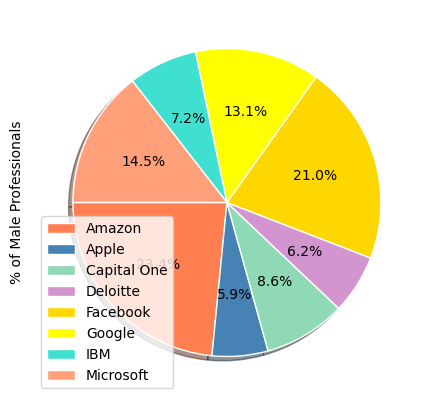

In [359]:
#Average number of males by company
male_company_count = male_df.groupby("company").count()['gender'].reset_index()
male_company_count = male_company_count[male_company_count['gender'] > 15]
male_company_count = male_company_count.set_index(['company'])
male_company_count = male_company_count.rename(columns={"gender": "% of Male Professionals"})
male_company_count.plot(kind='pie', y = '% of Male Professionals', autopct='%1.1f%%',labels=None, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, shadow=True, startangle=180, figsize = (7,5), colors = ['coral', 'steelblue', '#8fd9b6', '#d395d0','gold', 'yellow', 'turquoise','lightsalmon'])

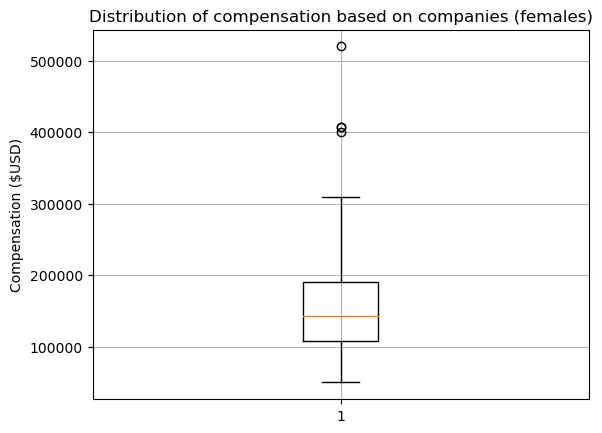

Summary Statistics


,totalyearlycompensation
count,130.00
mean,"159,833.75"
std,"75,434.46"
min,"50,000.00"
25%,"108,650.00"
50%,"143,333.33"
75%,"191,000.00"
max,"520,000.00"


In [360]:
#Average salary for females per company
female_company_salary = female_df.groupby("company").mean()['totalyearlycompensation'].reset_index()
fig4 = plt.figure()
ax = fig4.add_subplot(1,1,1)
ax.boxplot(female_company_salary['totalyearlycompensation'])
ax.set_title('Distribution of compensation based on companies (females)')
ax.set_ylabel('Compensation ($USD)')
ax.grid(True)
plt.show()
print("Summary Statistics")
female_company_salary.describe().applymap('{:,.2f}'.format)

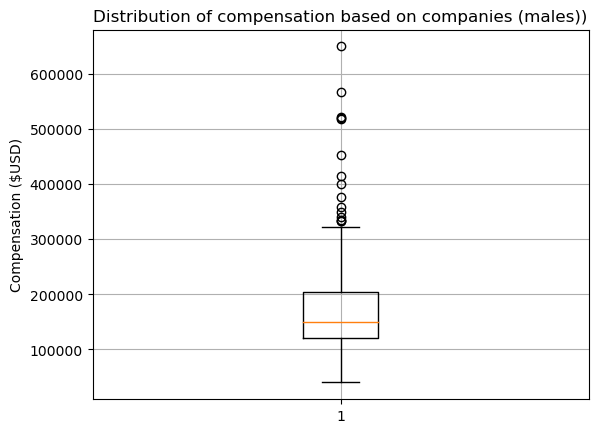

Summary Statistics


,totalyearlycompensation
count,236.00
mean,"174,594.53"
std,"89,843.07"
min,"40,000.00"
25%,"120,000.00"
50%,"150,250.00"
75%,"204,125.00"
max,"650,000.00"


In [361]:
#Average salary for males per company
male_company_salary = male_df.groupby("company").mean()['totalyearlycompensation'].reset_index()
fig5 = plt.figure()
ax = fig5.add_subplot(1,1,1)
ax.boxplot(male_company_salary['totalyearlycompensation'])
ax.set_title('Distribution of compensation based on companies (males))')
ax.set_ylabel('Compensation ($USD)')
ax.grid(True)
plt.show()
print("Summary Statistics")
male_company_salary.describe().applymap('{:,.2f}'.format)

In [362]:
#Performing linear regression of average compensation by companies vs average years of experience for females
female_company_salary = female_df.groupby("company").mean()['totalyearlycompensation'].reset_index()
female_salary = female_company_salary[['totalyearlycompensation']]

female_company_experience = female_df.groupby("company").mean()['yearsofexperience'].reset_index()
female_experience = female_company_experience[['yearsofexperience']]

C:\Users\hyeji\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(-1.25, 26.25, 26500.0, 543500.0)

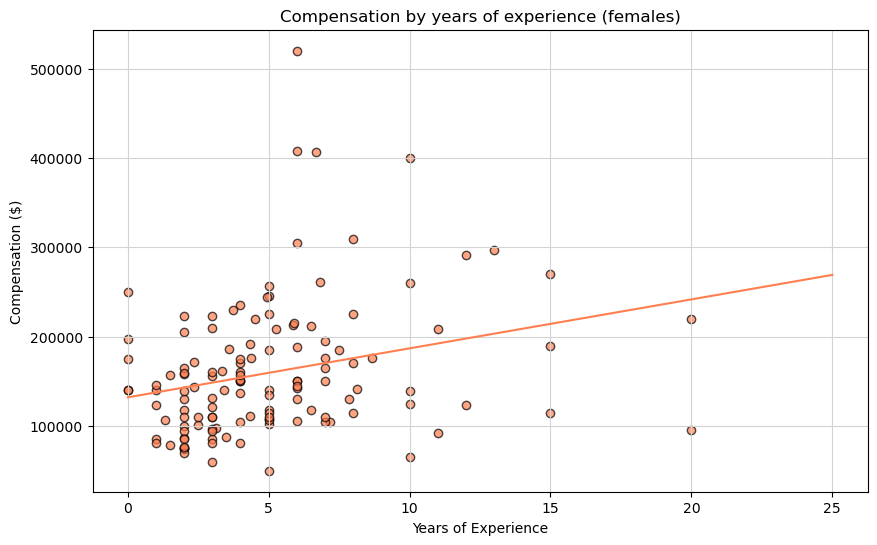

In [363]:
model = LinearRegression()
model.fit(female_experience, female_salary)

x_new = np.linspace(0, 25)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.scatter(female_experience,female_salary, c="coral",
          edgecolor="black", linewidths=1,
          alpha=0.7)
ax.plot(x_new, y_new, color = 'coral')

ax.set_xlabel('Years of Experience')
ax.set_ylabel('Compensation ($)')
ax.set_title('Compensation by years of experience (females)') 
ax.grid(color='lightgrey')

ax.axis('tight')

In [364]:
x = female_experience.iloc[:, 0].values.reshape(-1,1)
y = female_salary.iloc[:, 0].values.reshape(-1,1)

In [365]:
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     9.831
Date:                Fri, 09 Dec 2022   Prob (F-statistic):            0.00213
Time:                        16:41:16   Log-Likelihood:                -1639.2
No. Observations:                 130   AIC:                             3282.
Df Residuals:                     128   BIC:                             3288.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.321e+05   1.09e+04     12.114      0.0

In [366]:
#Performing linear regression of average compensation by companies vs average years of experience for males
male_company_salary = male_df.groupby("company").mean()['totalyearlycompensation'].reset_index()
male_salary = male_company_salary[['totalyearlycompensation']]

male_company_experience = male_df.groupby("company").mean()['yearsofexperience'].reset_index()
male_experience = male_company_experience[['yearsofexperience']]

C:\Users\hyeji\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(-1.25, 26.25, 9500.0, 680500.0)

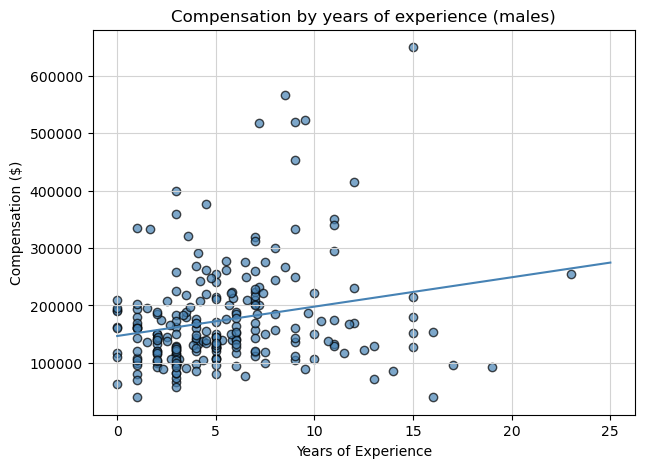

In [367]:
model = LinearRegression()
model.fit(male_experience, male_salary)

x1_new = np.linspace(0, 25)
y1_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(7, 5))
ax = plt.axes()
ax.scatter(male_experience,male_salary, c="steelblue",
          edgecolor="black", linewidths=1,
          alpha=0.7)
ax.plot(x1_new, y1_new, color = 'steelblue')

ax.set_xlabel('Years of Experience')
ax.set_ylabel('Compensation ($)')
ax.set_title('Compensation by years of experience (males)') 
ax.grid(color='lightgrey')

ax.axis('tight')

In [368]:
x1 = male_experience.iloc[:, 0].values.reshape(-1,1)
y1 = male_salary.iloc[:, 0].values.reshape(-1,1)

In [369]:
x1 = sm.add_constant(x1)

model = sm.OLS(y1, x1).fit()
predictions = model.predict(x1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     11.89
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           0.000667
Time:                        16:41:17   Log-Likelihood:                -3020.3
No. Observations:                 236   AIC:                             6045.
Df Residuals:                     234   BIC:                             6052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.467e+05   9902.657     14.815      0.0

In [371]:
#Exporting dataset to database
import sqlite3

In [372]:
conn =  sqlite3.connect('c:\\temp\\tech_compensation.db')

In [373]:
df1.to_sql('user',conn,if_exists="append",index=False)

1307

In [374]:
pd.read_sql('select * from user',conn)

,timestamp,gender,company,title,totalyearlycompensation,location,yearsofexperience,race,education,date,new_date,city,state,country,data scientist,business analyst
0,7/6/2020 17:16:12,Male,Google,Data Scientist,170000,"San Francisco, CA",3.0,White,Bachelor's Degree,2020-07-06 17:16:12,2020-07-06,San Francisco,CA,United States,1,0
1,7/6/2020 18:03:05,Female,Facebook,Data Scientist,205000,"Menlo Park, CA",0.0,Asian,PhD,2020-07-06 18:03:05,2020-07-06,Menlo Park,CA,United States,1,0
2,7/6/2020 22:10:39,Male,Microsoft,Data Scientist,220000,"Bellevue, WA",4.0,White,PhD,2020-07-06 22:10:39,2020-07-06,Bellevue,WA,United States,1,0
3,7/6/2020 22:31:17,Male,PayPal,Data Scientist,216000,"San Jose, CA",2.0,Asian,Master's Degree,2020-07-06 22:31:17,2020-07-06,San Jose,CA,United States,1,0
4,7/7/2020 8:03:56,Male,Amazon,Data Scientist,185000,"Cambridge, MA",25.0,White,Bachelor's Degree,2020-07-07 08:03:56,2020-07-07,Cambridge,MA,United States,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,8/15/2021 17:58:48,Male,Wayfair,Business Analyst,97000,"Boston, MA",2.0,Asian,Bachelor's Degree,2021-08-15 17:58:48,2021-08-15,Boston,MA,United States,0,1
1303,8/15/2021 22:31:26,Female,Adobe,Data Scientist,250000,"San Jose, CA",5.0,Asian,Master's Degree,2021-08-15 22:31:26,2021-08-15,San Jose,CA,United States,1,0
1304,8/16/2021 14:38:54,Female,Western Digital,Business Analyst,137000,"San Jose, CA",4.0,Asian,Master's Degree,2021-08-16 14:38:54,2021-08-16,San Jose,CA,United States,0,1
1305,8/16/2021 21:02:37,Male,Xandr,Data Scientist,120000,"Portland, OR",1.0,White,Master's Degree,2021-08-16 21:02:37,2021-08-16,Portland,OR,United States,1,0
